# Basics of Stats with Python

- CLT (central limit theorem)
- p-value, one-sample t-test
- z - score
- R2 - score (Coefficient of Determination)
- Chebyshev's inequality
- PSI and CSI: Top 2 model monitoring metrics (PSI - Population stability index, CSI - Characteristic stability index)




# CLT - central limit theorem

https://uk.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0_%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%87%D0%BD%D0%B0_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0

https://en.wikipedia.org/wiki/Central_limit_theorem


CLT: the distribution of a normalized version of the sample mean converges to a standard normal distribution.




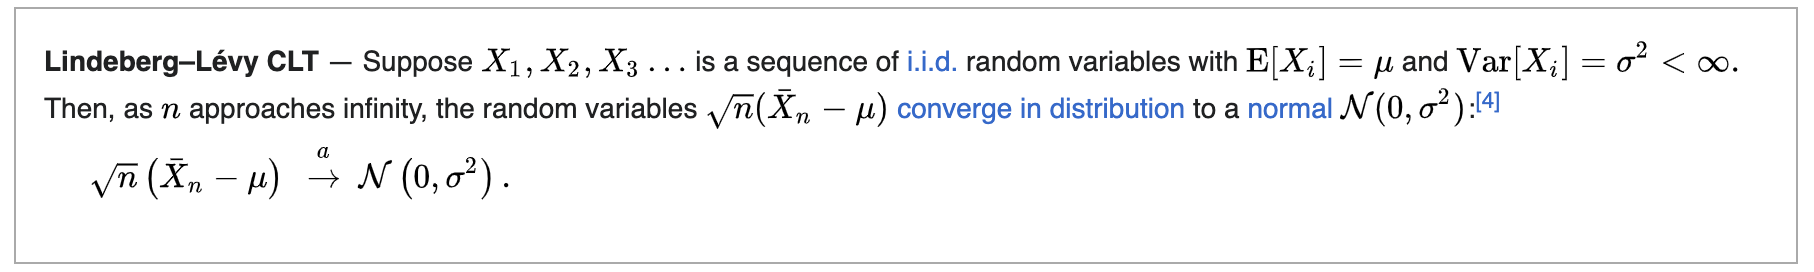

## P-value and t-test

**What is the P-value?**

https://www.geeksforgeeks.org/how-to-find-a-p-value-from-a-t-score-in-python/

It defines the probability of the result taking place from the sample space by chance.
P-value varies from 0 to 100%. Note that a lower p-value is considered good as it implies that a result didn’t take place by chance.


The strength of hypothesis testing is indicated by the p-value.


We develop hypotheses based on statistical models, and we use the p-value to assess the validity of the models. Using the **T-test** is one method of obtaining the p-value.

In [1]:
import numpy as np
from scipy.stats import t


def one_sample_t_test(sample, population_mean, alpha=0.05, tail="two"):
    # Step 1: Calculate T-score
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_size = len(sample)

    t_score = (sample_mean - population_mean) / \
        (sample_std / np.sqrt(sample_size))

    # Step 2: Determine degrees of freedom
    df = sample_size - 1

    # Step 3: Identify the appropriate t-distribution
    # No need to explicitly specify degrees of freedom for one-sample t-test in scipy.stats.t

    # Step 4: Find the p-value
    if tail == "two":
        p_value = t.sf(np.abs(t_score), df) * 2  # for two-tailed test
    elif tail == "left":
        p_value = t.sf(t_score, df)  # for left-tailed test
    elif tail == "right":
        p_value = t.sf(-t_score, df)  # for right-tailed test
    else:
        raise ValueError(
            "Invalid tail argument. Use 'two', 'left', or 'right'.")

    # Step 5: Interpret the p-value
    print("P-value:", p_value)

    if p_value < alpha:
        print(
            "Reject the null hypothesis. There is a statistically significant difference.")
        return True
    else:
        print("Fail to reject the null hypothesis. There is no statistically significant difference.")
        return False

In [2]:

# Let's generate a sample for experiment
np.random.seed(42)
# Generating a sample
sample_data = np.random.normal(loc=77, scale=10, size=250)
population_mean = 75

# Example for a two-tailed test
one_sample_t_test(sample_data, population_mean, tail="two")

P-value: 0.0013870092433008773
Reject the null hypothesis. There is a statistically significant difference.


True

## Z-score

In statistics, a z-score tells us how many standard deviations away a value is from the mean. We use the following formula to calculate a z-score:

z = (X – μ) / σ

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats

data = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22])
z = stats.zscore(data)

print(z)

[-1.39443338 -1.19522861 -1.19522861 -0.19920477  0.          0.
  0.39840954  0.5976143   1.19522861  1.79284291]


In [4]:
# Multidimentional

data = np.array([[5, 6, 7, 7, 8],
                 [8, 8, 8, 9, 9],
                 [2, 2, 4, 4, 5]])

z = stats.zscore(data, axis=1)
print(z)

[[-1.56892908 -0.58834841  0.39223227  0.39223227  1.37281295]
 [-0.81649658 -0.81649658 -0.81649658  1.22474487  1.22474487]
 [-1.16666667 -1.16666667  0.5         0.5         1.33333333]]


In [5]:
# Pandas
data = pd.DataFrame(np.random.randint(
    0, 10, size=(5, 3)), columns=['A', 'B', 'C'])
data

,A,B,C
0,7,4,0
1,6,4,5
2,6,2,9
3,2,4,5
4,8,4,0


In [6]:
data.apply(stats.zscore)

,A,B,C
0,0.588348,0.5,-1.108103
1,0.098058,0.5,0.349927
2,0.098058,-2.0,1.516351
3,-1.863103,0.5,0.349927
4,1.078639,0.5,-1.108103


# R^2 score (Coefficient of Determination)

https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/

R2 score is used to evaluate the performance of a linear regression model.
It describes depending on the ratio of total deviation of results described by the model.

R2= 1- SSres / SStot

where
SSres is the sum of squares of the residual errors.
SStot is the total sum of the errors.


**A higher value of R2 is desirable as it indicates better results.**

In [7]:
from sklearn.metrics import r2_score

# Assume y is the actual value and f is the predicted values
y = [10, 20, 30]
f = [10, 20, 30]
r2 = r2_score(y, f)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 1.0


# Chebyshev's inequality

https://en.wikipedia.org/wiki/Chebyshev%27s_inequality

Let X (integrable) be a random variable with finite non-zero variance σ2 (and thus finite expected value μ).[9] Then for any real number k > 0,

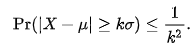

# PSI and CSI: Top 2 model monitoring metrics (PSI - Population stability index, CSI - Characteristic stability index)

*article with code:* https://towardsdatascience.com/checking-model-stability-and-population-shift-with-psi-and-csi-6d12af008783

https://parthaps77.medium.com/population-stability-index-psi-and-characteristic-stability-index-csi-in-machine-learning-6312bc52159d (refers to:
https://www.lexjansen.com/wuss/2017/47_Final_Paper_PDF.pdf
) 


https://habr.com/ru/companies/plarium/articles/515178/



PSI and CSI, both of these metrics focus on the shift in the POPULATION DISTRIBUTION.\
PSI and CSI, both calculates with the **same formula:**

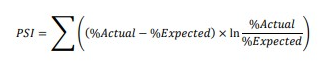


Characteristic Stability Index (CSI): It is the measure of the change in distribution of the independent variables over time. It can be used both for testing and performance tracking in a similar way to PSI, the comparison would be the distribution of variables unlike PSI where it is the model scores.


**Consider:**

**PSI < 0.1** = The population hasn’t changed, and we can keep the model\
**0.1 ≤ PSI < 0.2** = The population has slightly changed, and it is advisable to evaluate the impacts of these changes\
**PSI ≥ 0.2** = The changes in population are significant, and the model should be retrained or even redesigned.'


PSI example: https://github.com/vinyluis/Articles/blob/main/Model%20Stability/PSI.ipynb

CSI example: https://github.com/vinyluis/Articles/blob/main/Model%20Stability/CSI.ipynb


In [ ]:
# Source: https://github.com/vinyluis/Articles/tree/main/Model%20Stability
# https://towardsdatascience.com/checking-model-stability-and-population-shift-with-psi-and-csi-6d12af008783


def psi(score_initial, score_new, num_bins=10, mode='fixed'):

    eps = 1e-4

    # Sort the data
    score_initial.sort()
    score_new.sort()

    # Prepare the bins
    min_val = min(min(score_initial), min(score_new))
    max_val = max(max(score_initial), max(score_new))
    if mode == 'fixed':
        bins = [min_val + (max_val - min_val)*(i) /
                num_bins for i in range(num_bins+1)]
    elif mode == 'quantile':
        # Create the quantiles based on the initial population
        bins = pd.qcut(score_initial, q=num_bins, retbins=True)[1]
    else:
        raise ValueError(
            f"Mode \'{mode}\' not recognized. Your options are \'fixed\' and \'quantile\'")
    bins[0] = min_val - eps  # Correct the lower boundary
    bins[-1] = max_val + eps  # Correct the higher boundary

    # Bucketize the initial population and count the sample inside each bucket
    bins_initial = pd.cut(score_initial, bins=bins,
                          labels=range(1, num_bins+1))
    df_initial = pd.DataFrame({'initial': score_initial, 'bin': bins_initial})
    grp_initial = df_initial.groupby('bin').count()
    grp_initial['percent_initial'] = grp_initial['initial'] / \
        sum(grp_initial['initial'])

    # Bucketize the new population and count the sample inside each bucket
    bins_new = pd.cut(score_new, bins=bins, labels=range(1, num_bins+1))
    df_new = pd.DataFrame({'new': score_new, 'bin': bins_new})
    grp_new = df_new.groupby('bin').count()
    grp_new['percent_new'] = grp_new['new'] / sum(grp_new['new'])

    # Compare the bins to calculate PSI
    psi_df = grp_initial.join(grp_new, on="bin", how="inner")

    # Add a small value for when the percent is zero
    psi_df['percent_initial'] = psi_df['percent_initial'].apply(
        lambda x: eps if x == 0 else x)
    psi_df['percent_new'] = psi_df['percent_new'].apply(
        lambda x: eps if x == 0 else x)

    # Calculate the psi
    psi_df['psi'] = (psi_df['percent_initial'] - psi_df['percent_new']) * \
        np.log(psi_df['percent_initial'] / psi_df['percent_new'])

    # Return the psi values
    return psi_df['psi'].values